In [2]:
import pandas as pd

# Create a small sample dataset
data = {
    'age': [45, 23, 56, 31, 40, 27, 60, 33],
    'policy_annual_premium': [500, 1200, 300, 700, 450, 1100, 350, 900],
    'incident_severity': ['Minor Damage','Major Damage','Total Loss','Minor Damage','Total Loss','Major Damage','Minor Damage','Major Damage'],
    'fault': ['policyholder', 'third party', 'policyholder', 'policyholder', 'third party', 'third party', 'policyholder', 'third party'],
    'total_claim_amount': [1500, 5000, 12000, 2000, 15000, 4000, 1800, 6000],
    'fraud_reported': [0, 1, 1, 0, 1, 0, 0, 1]
}

df = pd.DataFrame(data)
df.head()


,age,policy_annual_premium,incident_severity,fault,total_claim_amount,fraud_reported
0,45,500,Minor Damage,policyholder,1500,0
1,23,1200,Major Damage,third party,5000,1
2,56,300,Total Loss,policyholder,12000,1
3,31,700,Minor Damage,policyholder,2000,0
4,40,450,Total Loss,third party,15000,1


In [3]:
df['fraud_reported'].value_counts()


,count
fraud_reported,
0,4
1,4


In [8]:
pd.crosstab(df['incident_severity'], df['fraud_reported'], normalize='index') * 100


fraud_reported,0,1
incident_severity,,
Major Damage,33.333333,66.666667
Minor Damage,100.000000,0.000000
Total Loss,0.000000,100.000000


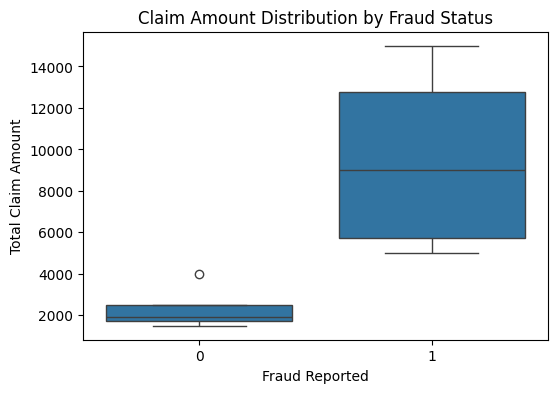

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(x='fraud_reported', y='total_claim_amount', data=df)
plt.title("Claim Amount Distribution by Fraud Status")
plt.xlabel("Fraud Reported")
plt.ylabel("Total Claim Amount")
plt.show()


In [12]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
le = LabelEncoder()

# Encode categorical columns
for col in ['incident_severity', 'fault']:
    df_encoded[col] = le.fit_transform(df_encoded[col])


In [13]:
X = df_encoded.drop('fraud_reported', axis=1)
y = df_encoded['fraud_reported']


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3


Confusion Matrix:
 [[1 1]
 [0 1]]
